* Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed 
 and draw inferences.

* Data Description:

* Murder -- Muder rates in different places of United States
* Assualt- Assualt rate in different places of United States
* UrbanPop - urban population in different places of United States
* Rape - Rape rate in different places of United States

* Loaded the dataset 'crime_data'
* Normalized the all input variable of the dataset.
* Removed the area column from the input variables.

* Hierarchial clustering

* Hierarchial clustering with no. of clusters as 5
        
    Clusters    Counts
        0           46
        1            1
        2            1
        3            1
        4            1

* Plotted the graph for the clusters obtained
* However, did not obtain distinct clusters for the crime type

* KMEANS CLUSTERING

* standardized the input
* Plotted elbow curve to obtain the ideal no. of clusters from the curve.
* Did KMeans Clustering with No. of clusters as 4

    cluster   Counts
        0         16
        2         13
        3         13
        1          8
        
* Plotted the graph for the clusters obtained
* To some extent distinct clusters were obtained with crime types.
* Areawise clusters were plotted for the crime type.

* DBSCAN CLUSTERING

* DBSCAN with min_samples=3, eps=25 was done

    cluster   counts
       2          20
       1          14
       0          13
      -1           3
      
* DBSCAN separates noise from the clusters.
* Here, 0, 1 and 2 are the three different clusters, and -1 is the noise. 
* DBSCAN will not consider the noise in the clusters, it will keep the noise as a separate entity.
* Location wise distinct clusters were obtained for crime "Assault" with presence of 3 noise.


In [109]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans

from sklearn.preprocessing import StandardScaler


In [110]:
crime_ds = pd.read_csv('crime_data.csv')
crime_ds.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [111]:
crime_ds = crime_ds.rename(columns={'Unnamed: 0': 'Area'})
crime_ds.head()

,Area,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [112]:
print(crime_ds.shape)
print(crime_ds.dtypes)
print(crime_ds.isna().sum())
crime_ds.describe(include='all')

(50, 5)
Area         object
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object
Area        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64


,Area,Murder,Assault,UrbanPop,Rape
count,50,50.00000,50.000000,50.000000,50.000000
unique,50,NaN,NaN,NaN,NaN
top,New Hampshire,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,7.78800,170.760000,65.540000,21.232000
std,NaN,4.35551,83.337661,14.474763,9.366385
min,NaN,0.80000,45.000000,32.000000,7.300000
25%,NaN,4.07500,109.000000,54.500000,15.075000
50%,NaN,7.25000,159.000000,66.000000,20.100000
75%,NaN,11.25000,249.000000,77.750000,26.175000


In [113]:
def normfunc(i):
    x= (i - i.min())/(i.max()-i.min())
    return x        

In [114]:
# normalizing all columns from murder to rape
df_norm = normfunc(crime_ds.iloc[:,1:])
df_norm.head(10)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


## Hierarchial Clustering

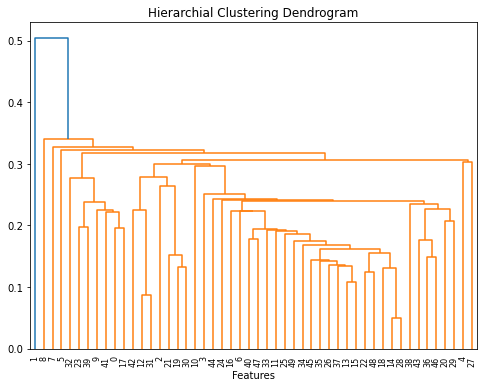

In [115]:
#creating dendogram
plt.figure(figsize=(8,6))
plt.title('Hierarchial Clustering Dendrogram')
plt.xlabel('Features')
dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'single'))
plt.show()

In [116]:
# creating clusters
# we are assuming n_clusters=3
#hier_cluster = AgglomerativeClustering(n_clusters=3,linkage = 'single')
hier_cluster = AgglomerativeClustering(n_clusters=5,linkage = 'single')
y_predict_clusters = hier_cluster.fit_predict(df_norm) # passing normalized input
y_predict_clusters

array([0, 3, 0, 0, 0, 4, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [117]:
crime_ds['clusters'] = y_predict_clusters
crime_ds.head(10)

,Area,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,4
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [118]:
crime_ds['clusters'].value_counts()

0    46
1     1
2     1
3     1
4     1
Name: clusters, dtype: int64

In [119]:
crime_ds[crime_ds['clusters'] == 0]

,Area,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
6,Connecticut,3.3,110,77,11.1,0
9,Georgia,17.4,211,60,25.8,0
10,Hawaii,5.3,46,83,20.2,0
11,Idaho,2.6,120,54,14.2,0
12,Illinois,10.4,249,83,24.0,0
13,Indiana,7.2,113,65,21.0,0


In [120]:
crime_ds[crime_ds['clusters'] == 1]

,Area,Murder,Assault,UrbanPop,Rape,clusters
7,Delaware,5.9,238,72,15.8,1


In [121]:
crime_ds[crime_ds['clusters'] == 2]

,Area,Murder,Assault,UrbanPop,Rape,clusters
8,Florida,15.4,335,80,31.9,2


<AxesSubplot:xlabel='Murder', ylabel='Assault'>

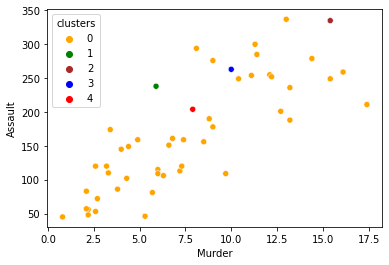

In [122]:
sns.scatterplot('Murder', 'Assault', hue='clusters', data=crime_ds,
                   palette=['orange','green','brown','blue','red'])

<AxesSubplot:xlabel='Assault', ylabel='Rape'>

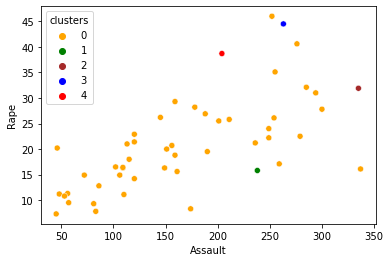

In [123]:
sns.scatterplot('Assault', 'Rape', hue='clusters', data=crime_ds,
                   palette=['orange','green','brown','blue','red'])

<AxesSubplot:xlabel='Area', ylabel='Murder'>

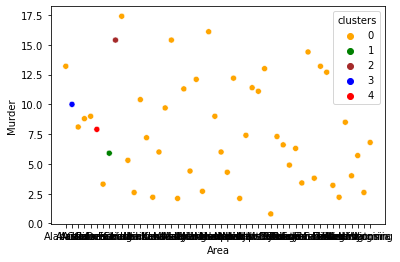

In [125]:
sns.scatterplot('Area', 'Murder', hue='clusters', data=crime_ds,
                   palette=['orange','green','brown','blue','red'])

<AxesSubplot:xlabel='Area', ylabel='Assault'>

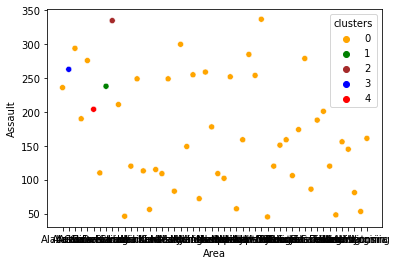

In [126]:
sns.scatterplot('Area', 'Assault', hue='clusters', data=crime_ds,
                   palette=['orange','green','brown','blue','red'])

<AxesSubplot:xlabel='Area', ylabel='Rape'>

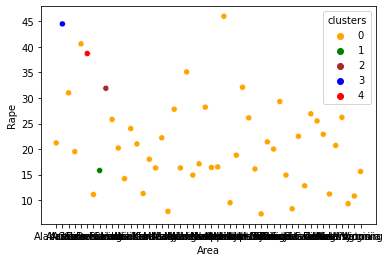

In [127]:
sns.scatterplot('Area', 'Rape', hue='clusters', data=crime_ds,
                   palette=['orange','green','brown','blue','red'])

## K-Means Clustering

In [128]:
crime_ds = pd.read_csv('crime_data.csv')
crime_ds.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [129]:
# Normalization function 
scaler = StandardScaler()
scaled_input = scaler.fit_transform(crime_ds.iloc[:,1:])
scaled_input

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

1 [200.0]
2 [200.0, 104.96163315756873]
3 [200.0, 104.96163315756873, 80.0657554011071]
4 [200.0, 104.96163315756873, 80.0657554011071, 57.55425863091106]
5 [200.0, 104.96163315756873, 80.0657554011071, 57.55425863091106, 50.10617286461218]
6 [200.0, 104.96163315756873, 80.0657554011071, 57.55425863091106, 50.10617286461218, 43.85386842769549]
7 [200.0, 104.96163315756873, 80.0657554011071, 57.55425863091106, 50.10617286461218, 43.85386842769549, 40.66090728145142]
8 [200.0, 104.96163315756873, 80.0657554011071, 57.55425863091106, 50.10617286461218, 43.85386842769549, 40.66090728145142, 36.72830026426235]
9 [200.0, 104.96163315756873, 80.0657554011071, 57.55425863091106, 50.10617286461218, 43.85386842769549, 40.66090728145142, 36.72830026426235, 33.01592352692286]
10 [200.0, 104.96163315756873, 80.0657554011071, 57.55425863091106, 50.10617286461218, 43.85386842769549, 40.66090728145142, 36.72830026426235, 33.01592352692286, 28.67392565608195]


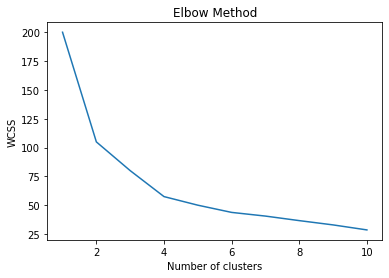

In [130]:
# How to find optimum number of  cluster before passing it in the KMeans() as n_clusters
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:
# wcss - within clusters creating sum of squared errors
# inertia is the sum of squared error for each cluster
# therefore, smaller the inertia, denser the cluster is (all points are closer to cluster)

wcss = []
for i in range(1,11): # n_clusters values from 1 to 11
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_input) # passing scaled input
    wcss.append(kmeans.inertia_)
    print(i,wcss)
    
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [131]:
# from above elbow curve, clusters = 4
kmeans_clusters = KMeans( n_clusters = 4 , random_state = 42 )
kmeans_clusters.fit(scaled_input)
kmeans_clusters.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [133]:
crime_ds['clusters']  = kmeans_clusters.labels_
crime_ds

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


In [134]:
crime_ds['clusters'].value_counts()

0    16
2    13
3    13
1     8
Name: clusters, dtype: int64

In [135]:
crime_ds[crime_ds['clusters'] == 0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0


In [136]:
crime_ds[crime_ds['clusters'] == 1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,1
3,Arkansas,8.8,190,50,19.5,1
9,Georgia,17.4,211,60,25.8,1
17,Louisiana,15.4,249,66,22.2,1
23,Mississippi,16.1,259,44,17.1,1
32,North Carolina,13.0,337,45,16.1,1
39,South Carolina,14.4,279,48,22.5,1
41,Tennessee,13.2,188,59,26.9,1


In [137]:
crime_ds[crime_ds['clusters'] == 2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
8,Florida,15.4,335,80,31.9,2
12,Illinois,10.4,249,83,24.0,2
19,Maryland,11.3,300,67,27.8,2
21,Michigan,12.1,255,74,35.1,2
24,Missouri,9.0,178,70,28.2,2
27,Nevada,12.2,252,81,46.0,2


In [138]:
crime_ds[crime_ds['clusters'] == 3]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
11,Idaho,2.6,120,54,14.2,3
14,Iowa,2.2,56,57,11.3,3
16,Kentucky,9.7,109,52,16.3,3
18,Maine,2.1,83,51,7.8,3
22,Minnesota,2.7,72,66,14.9,3
25,Montana,6.0,109,53,16.4,3
26,Nebraska,4.3,102,62,16.5,3
28,New Hampshire,2.1,57,56,9.5,3
33,North Dakota,0.8,45,44,7.3,3
40,South Dakota,3.8,86,45,12.8,3


<AxesSubplot:xlabel='Murder', ylabel='Assault'>

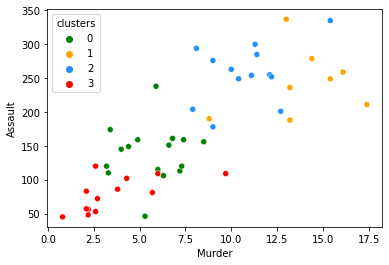

In [139]:
sns.scatterplot(x='Murder', y='Assault', hue='clusters', data=crime_ds,
                   palette=['green','orange','dodgerblue','red'])

<AxesSubplot:xlabel='Murder', ylabel='Rape'>

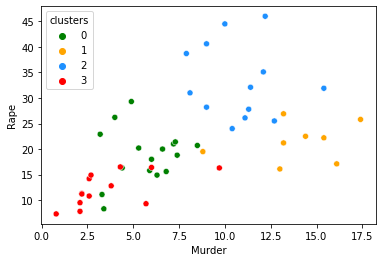

In [140]:
sns.scatterplot(x='Murder', y='Rape', hue='clusters', data=crime_ds,
                   palette=['green','orange','dodgerblue','red'])

<AxesSubplot:xlabel='Assault', ylabel='Rape'>

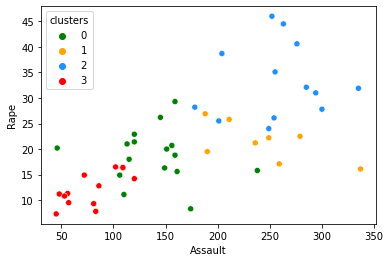

In [141]:
sns.scatterplot(x='Assault', y='Rape', hue='clusters', data=crime_ds,
                   palette=['green','orange','dodgerblue','red'])

<AxesSubplot:xlabel='Location', ylabel='Assault'>

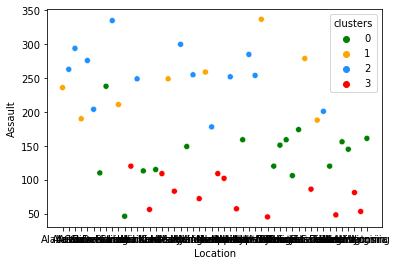

In [142]:
plt.xlabel('Location')
sns.scatterplot(x='Unnamed: 0', y='Assault', hue='clusters', data=crime_ds,
                   palette=['green','orange','dodgerblue','red'])

<AxesSubplot:xlabel='Location', ylabel='Murder'>

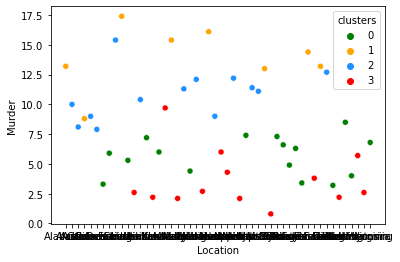

In [143]:
plt.xlabel('Location')
sns.scatterplot(x='Unnamed: 0', y='Murder', hue='clusters', data=crime_ds,
                   palette=['green','orange','dodgerblue','red'])

<AxesSubplot:xlabel='Location', ylabel='Rape'>

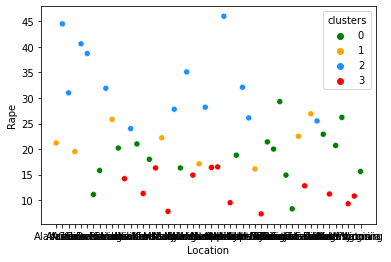

In [144]:
plt.xlabel('Location')
sns.scatterplot(x='Unnamed: 0', y='Rape', hue='clusters', data=crime_ds,
                   palette=['green','orange','dodgerblue','red'])

## DBSCAN Clustering

In [145]:
crime_ds = pd.read_csv('crime_data.csv')
crime_ds.head(10)
input_data = crime_ds.iloc[:,1:]
input_data

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [146]:
dbs = DBSCAN(min_samples=3,eps=25)
dbs_clusters=dbs.fit(input_data)
dbs_clusters.labels_

array([ 0, -1,  0,  1,  0,  1,  2,  0, -1,  1,  2,  2,  0,  2,  2,  2,  2,
        0,  2,  0,  1,  0,  2,  0,  1,  2,  2,  0,  2,  1,  0,  0, -1,  2,
        2,  1,  1,  2,  1,  0,  2,  1,  1,  2,  2,  1,  1,  2,  2,  1],
      dtype=int64)

In [147]:
crime_ds['clusters'] = dbs_clusters.labels_
crime_ds.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,1


In [148]:
crime_ds['clusters'].value_counts()

 2    20
 1    14
 0    13
-1     3
Name: clusters, dtype: int64

* DBSCAN separates noise from the clusters.
* Here, 0, 1 and 2 are the three different clusters, and -1 is the noise. 
* DBSCAN will not consider the noise in the clusters.

In [149]:
crime_ds[crime_ds['clusters'] == 0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,0
2,Arizona,8.1,294,80,31.0,0
4,California,9.0,276,91,40.6,0
7,Delaware,5.9,238,72,15.8,0
12,Illinois,10.4,249,83,24.0,0
17,Louisiana,15.4,249,66,22.2,0
19,Maryland,11.3,300,67,27.8,0
21,Michigan,12.1,255,74,35.1,0
23,Mississippi,16.1,259,44,17.1,0
27,Nevada,12.2,252,81,46.0,0


In [150]:
crime_ds[crime_ds['clusters'] == 1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
3,Arkansas,8.8,190,50,19.5,1
5,Colorado,7.9,204,78,38.7,1
9,Georgia,17.4,211,60,25.8,1
20,Massachusetts,4.4,149,85,16.3,1
24,Missouri,9.0,178,70,28.2,1
29,New Jersey,7.4,159,89,18.8,1
35,Oklahoma,6.6,151,68,20.0,1
36,Oregon,4.9,159,67,29.3,1
38,Rhode Island,3.4,174,87,8.3,1
41,Tennessee,13.2,188,59,26.9,1


In [151]:
crime_ds[crime_ds['clusters'] == 2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
6,Connecticut,3.3,110,77,11.1,2
10,Hawaii,5.3,46,83,20.2,2
11,Idaho,2.6,120,54,14.2,2
13,Indiana,7.2,113,65,21.0,2
14,Iowa,2.2,56,57,11.3,2
15,Kansas,6.0,115,66,18.0,2
16,Kentucky,9.7,109,52,16.3,2
18,Maine,2.1,83,51,7.8,2
22,Minnesota,2.7,72,66,14.9,2
25,Montana,6.0,109,53,16.4,2


<AxesSubplot:xlabel='Murder', ylabel='Assault'>

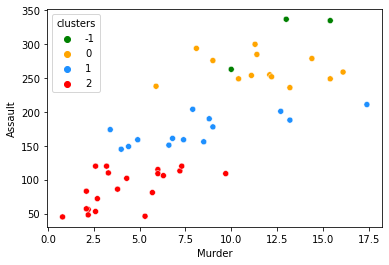

In [152]:
sns.scatterplot(x='Murder', y='Assault', hue='clusters', data=crime_ds,
                   palette=['green','orange','dodgerblue','red'])

<AxesSubplot:xlabel='Murder', ylabel='Rape'>

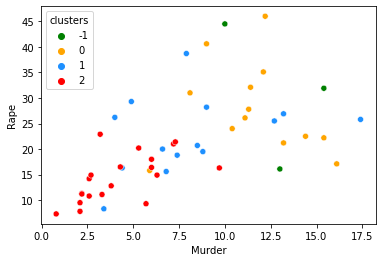

In [153]:
sns.scatterplot(x='Murder', y='Rape', hue='clusters', data=crime_ds,
                   palette=['green','orange','dodgerblue','red'])

<AxesSubplot:xlabel='Assault', ylabel='Rape'>

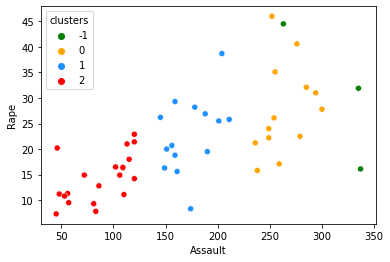

In [154]:
sns.scatterplot(x='Assault', y='Rape', hue='clusters', data=crime_ds,
                   palette=['green','orange','dodgerblue','red'])

<AxesSubplot:xlabel='Location', ylabel='Assault'>

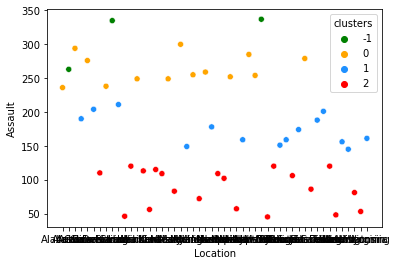

In [155]:
plt.xlabel('Location')
sns.scatterplot(x='Unnamed: 0', y='Assault', hue='clusters', data=crime_ds,
                   palette=['green','orange','dodgerblue','red'])

# from the graph below
# Locationwise distinct clusters were obtained for 'Assault'
# presence of 3 noise can be seen (green in color)

<AxesSubplot:xlabel='Location', ylabel='Murder'>

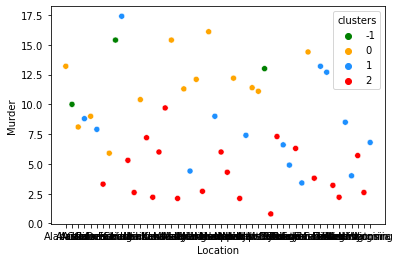

In [156]:
plt.xlabel('Location')
sns.scatterplot(x='Unnamed: 0', y='Murder', hue='clusters', data=crime_ds,
                   palette=['green','orange','dodgerblue','red'])

<AxesSubplot:xlabel='Location', ylabel='Rape'>

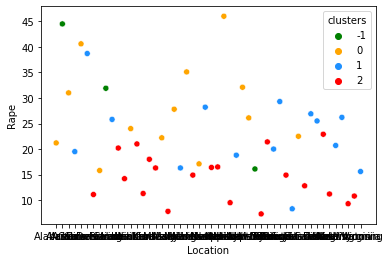

In [159]:
plt.xlabel('Location')
sns.scatterplot(x='Unnamed: 0', y='Rape', hue='clusters', data=crime_ds,
                   palette=['green','orange','dodgerblue','red'])